## HW11 - PCA
Katie Corcoran

#### 0. Load the data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
rand_state = 1000

df = pd.read_csv('Mall_Customers.csv')
df['Male'] = np.where(df['Gender'] == 'Male', 1, 0)
X = df.drop(['CustomerID', 'Gender'], axis=1, inplace=False)
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


#### 1. Define 3 principal components

In [16]:
from pca import pca
model = pca(n_components=3)

#### 2. Fit the model

In [18]:
results = model.fit_transform(X)
loadings = results['loadings']
loadings.T

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC1,PC2,PC3
Age,-0.188977,0.130961,0.973208
Annual Income (k$),0.588623,0.808388,0.005515
Spending Score (1-100),0.786009,-0.573895,0.229856
Male,-0.000333,0.001579,0.001462


In [8]:

scores=results['PC']
scores

,PC1,PC2,PC3
0,-31.869945,-33.001252,-22.142987
1,0.764494,-56.842901,-10.542634
2,-57.408276,-13.124961,-28.750964
3,-2.168543,-53.478590,-9.511588
4,-32.174085,-30.388412,-10.225069
...,...,...,...
195,58.352515,31.017542,3.200135
196,19.908001,66.446108,1.242664
197,58.520804,38.346039,-0.834218
198,20.979130,79.376405,-13.645474


#### 3. PVE

In [9]:
variance = results['explained_var']
variance

array([0.45118077, 0.89209616, 0.99984183])

#### 4. Scree plot

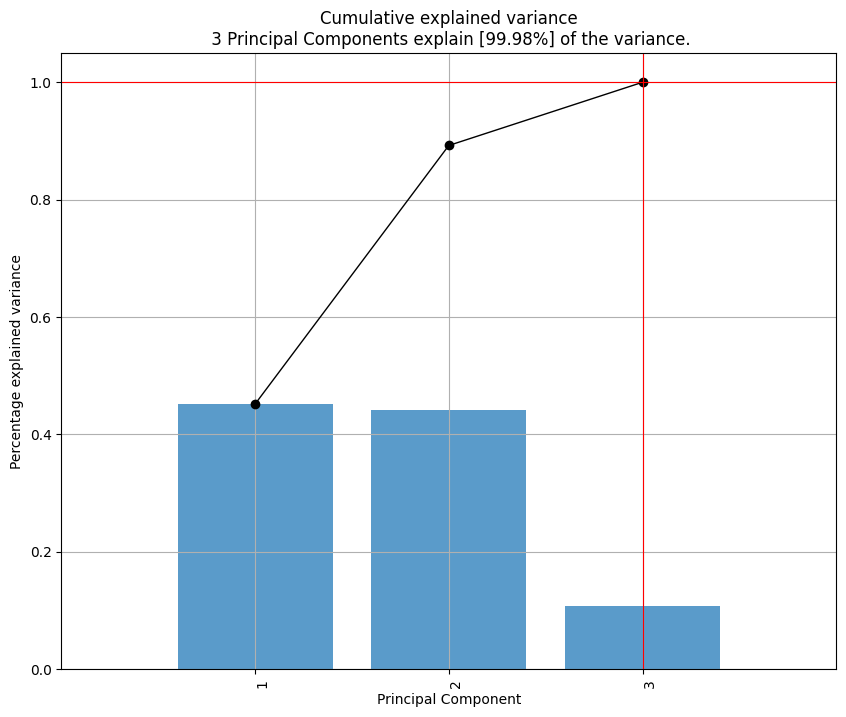

In [10]:
model.plot(figsize=(10,8))
plt.show()

This plot shows us that principal components 1 and 2 explain a large bulk of the variance, with principal component 3 explaining the remaining ~10%.

#### 5. Biplot

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


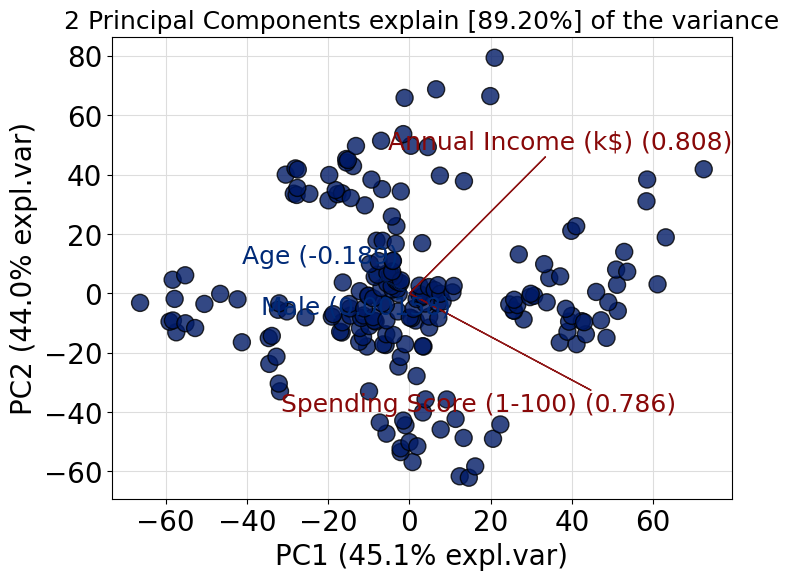

In [22]:
model = pca(n_components=2)
model.fit_transform(X)
model.biplot(figsize=(8,6))
plt.show()

This biplot shows that PC1 explains 45.1% of the variance, while PC2 explains 44% of the variance. With only two principal components, age and male provide very little contribution to the principal components, while annual income and spending score both have a similarly high influence.

#### 6. Customer Segments

Based on the biplot, I would recommend 5 clusters of customers. There seem to be 4 clusters around the 4 quadrants of the plot and one larger cluster in the middle.